In [8]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dat = pd.read_json("/Users/siddharthgianchandani/vscode projects/ds-showcase/Streaming_History_Audio_2025-2026_7.json")

data = pd.DataFrame(dat)
data

,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_uri,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2025-10-17T08:46:55Z,ios,169000,GB,5.151.173.140,So Easy (To Fall In Love),Olivia Dean,The Art of Loving,spotify:track:6sGIMrtIzQjdzNndVxe397,None,...,NaN,NaN,NaN,trackdone,trackdone,False,False,False,1760690646,False
1,2025-10-17T08:49:23Z,ios,146813,GB,5.151.173.140,If You Don't Want My Love,Jalen Ngonda,Come Around and Love Me,spotify:track:4A48ckONJNoXU5smWT9CeG,None,...,NaN,NaN,NaN,trackdone,trackdone,False,False,False,1760690815,False
2,2025-10-17T08:52:32Z,osx,134281,GB,5.151.173.138,Radha,Vishal-Shekhar,Student of the Year (Original Motion Picture S...,spotify:track:6f7zyAEUCZuvX4Zty62Z5o,None,...,NaN,NaN,NaN,trackdone,remote,True,False,False,1760632047,False
3,2025-10-17T08:52:39Z,ios,195998,GB,5.151.173.140,On The Wire,Couch,On The Wire,spotify:track:3skiUNigP6jbRfcBnBkFnQ,None,...,NaN,NaN,NaN,trackdone,trackdone,False,False,False,1760690963,False
4,2025-10-17T08:55:56Z,ios,196796,GB,5.151.173.140,WHERE IS MY HUSBAND!,RAYE,WHERE IS MY HUSBAND!,spotify:track:55lijDD6OAjLFFUHU9tcDm,None,...,NaN,NaN,NaN,trackdone,trackdone,False,False,False,1760691159,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14016,2026-01-19T23:28:50Z,ios,265000,GB,148.252.146.81,Bure Din,Seedhe Maut,Bure Din,spotify:track:7MIXOmJ6YaFEOIceEMs28B,None,...,NaN,NaN,NaN,trackdone,trackdone,False,False,False,1768865064,False
14017,2026-01-19T23:32:42Z,ios,231786,GB,148.252.146.81,Roshni,Bharg,NIKAMMA,spotify:track:2HG7HYy6d5aVAPoBNdWjs6,None,...,NaN,NaN,NaN,trackdone,trackdone,False,False,False,1768865330,False
14018,2026-01-19T23:39:12Z,ios,341,GB,148.252.146.81,Still Crazy After All These Years,Paul Simon,Still Crazy After All These Years,spotify:track:3gIBSlXYIN1mru35l4LWPB,None,...,NaN,NaN,NaN,clickrow,endplay,False,True,False,1768865952,False
14019,2026-01-19T23:39:12Z,ios,58460,GB,148.252.146.81,"Yun Hi Chala Chal (From ""Swades"")",Udit Narayan,Best Of Kailash Kher,spotify:track:2Q4PfYBPwVBONmzqrtBHFr,None,...,NaN,NaN,NaN,trackdone,endplay,False,True,False,1768865562,False


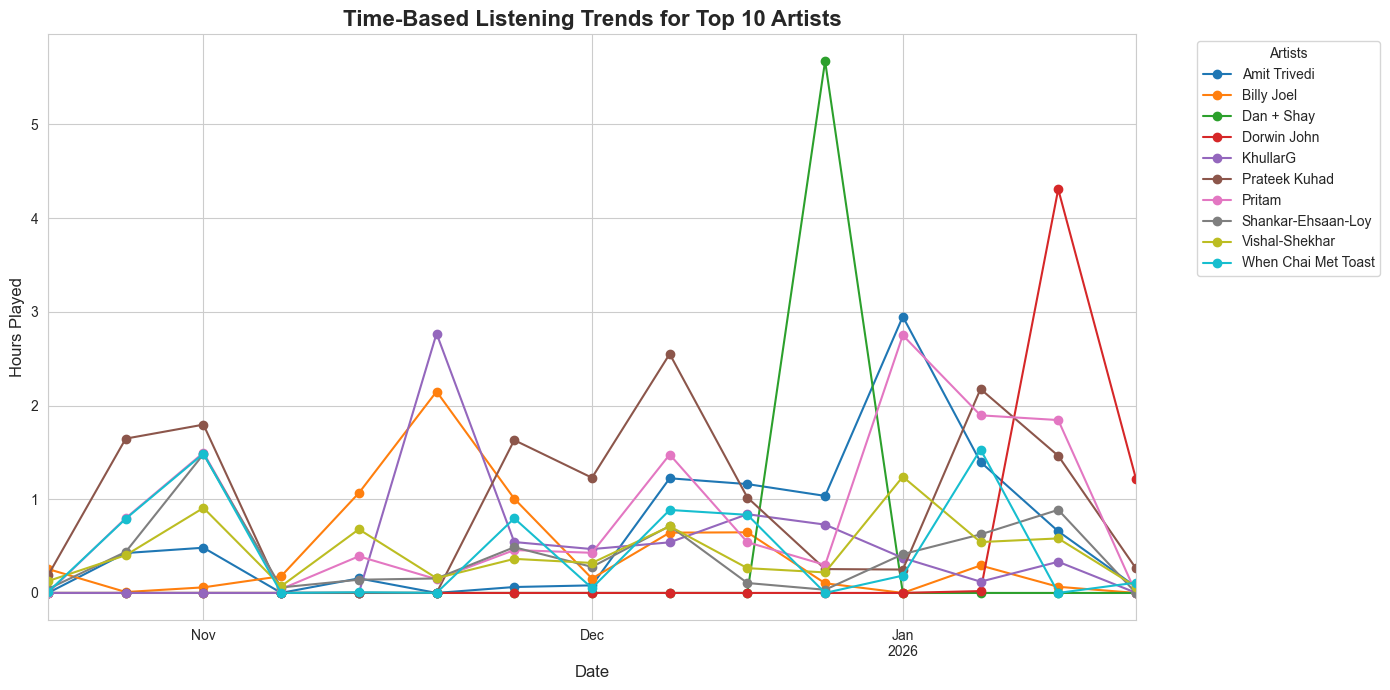

In [11]:
# 1. Ensure timestamp is datetime and set as index
# (Change 'ts' to 'endTime' if that is your column name)
data['ts'] = pd.to_datetime(data['ts'])

# 2. Identify your Top 10 artists overall to keep the graph clean
top_10_artists = data.groupby('master_metadata_album_artist_name')['ms_played'].sum().nlargest(10).index

# 3. Filter data for only those artists
top_artists_df = data[data['master_metadata_album_artist_name'].isin(top_10_artists)].copy()

# 4. Resample by Month (or 'W' for Week) to see trends
# We sum the ms_played for each artist per month
trends = top_artists_df.groupby([pd.Grouper(key='ts', freq='W'), 'master_metadata_album_artist_name'])['ms_played'].sum().unstack(fill_value=0)

# 5. Convert ms to Hours for better readability
trends_hours = trends / (1000 * 60 * 60)

# 6. Plotting
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")
trends_hours.plot(kind='line', marker='o', ax=plt.gca())

plt.title('Time-Based Listening Trends for Top 10 Artists', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Hours Played', fontsize=12)
plt.legend(title='Artists', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()